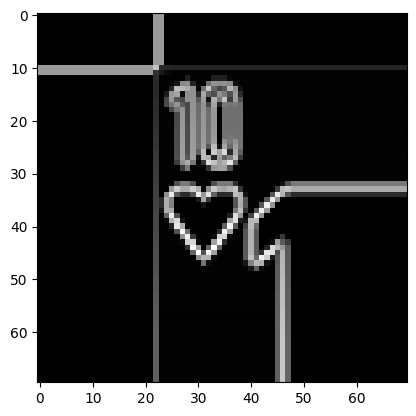

T h


In [1]:
# 匯入相關所需的模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from pathlib import PurePath
import cv2


from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,Input
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

# 載入數據集
data_path = 'label/'
categories = [i + j for i in 'A23456789TJQK' for j in "shdc"]
suites = 'shdc'
number = 'A23456789TJQK'

number_images = []
number_labels = []
suites_images = []
suites_labels = []


# 讀取圖片和標籤

index = 0
indexToNumber = {}
indexToSuites = {}
for category in categories:
    path = os.path.join(data_path, category)
    suites_class = suites.index(category[1])
    number_class = number.index(category[0])

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path,0)
        img_array = cv2.copyMakeBorder(img_array, 9, 9, 21, 21, cv2.BORDER_REPLICATE)
        img_array = img_array.astype('float32')/255.
        number_images.append(img_array)
        suites_images.append(img_array)
        number_labels.append(number_class)
        suites_labels.append(suites_class)
        indexToNumber[index] = number_class
        indexToSuites[index] = suites_class
        index += 1


# print(img_array)
# print(img_path)
# 將圖片轉換為NumPy數組
number_images = np.array(number_images)
suites_images = np.array(suites_images)
number_labels = np.array(number_labels)
suites_labels = np.array(suites_labels)

one_hot_number_labels = to_categorical(number_labels, 13)
one_hot_suites_labels = to_categorical(suites_labels, 4)


test = 150
plt.imshow(number_images[test], cmap=plt.get_cmap('gray'))
plt.show()

print(number[indexToNumber[test]],suites[indexToSuites[test]])

In [8]:
number_images = []
number_labels = []
suites_images = []
suites_labels = []

for img in os.listdir('./preprocess'):
    img_path = os.path.join('./preprocess', img)
    img_array = cv2.imread(img_path,0)
    img_array = img_array.astype('float32')/255.
    img_index = int(img.split('_')[1])
    number_images.append(img_array)
    suites_images.append(img_array)
    number_labels.append(indexToNumber[img_index])
    suites_labels.append(indexToSuites[img_index])


number_images = np.array(number_images)
suites_images = np.array(suites_images)
number_labels = np.array(number_labels)
suites_labels = np.array(suites_labels)

one_hot_number_labels = to_categorical(number_labels, 13)
one_hot_suites_labels = to_categorical(suites_labels, 4)

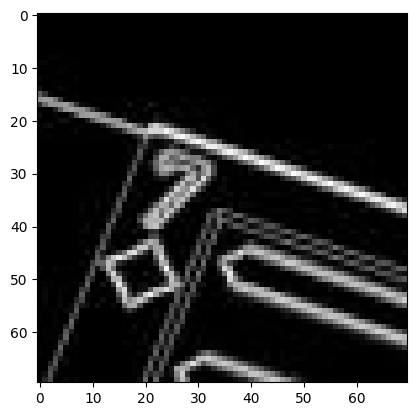

7 d


In [10]:
test = 185
plt.imshow(number_images[test], cmap=plt.get_cmap('gray'))
plt.show()

print(number[number_labels[test]],suites[suites_labels[test]])

In [49]:
# 切割數據集為訓練集和測試集

X_number_train, X_number_test, y_number_train, y_number_test = train_test_split(number_images.reshape(-1,70,70,1), one_hot_number_labels, test_size=0.2, random_state=42)


# 建立卷積神經網絡模型
numbermodel = Sequential()
numbermodel.add(Input(shape=(70, 70, 1)))
numbermodel.add(Conv2D(32, (3, 3),padding = 'same', activation='relu'))
numbermodel.add(MaxPooling2D((2, 2)))
numbermodel.add(Dropout(0.2))
numbermodel.add(Conv2D(64, (3, 3),padding = 'same', activation='relu'))
numbermodel.add(MaxPooling2D((2, 2)))
numbermodel.add(Dropout(0.2))
numbermodel.add(Conv2D(64, (3, 3),padding = 'same', activation='relu'))
numbermodel.add(MaxPooling2D((2, 2)))
numbermodel.add(Dropout(0.2))
numbermodel.add(Conv2D(32, (3, 3),padding = 'same', activation='relu'))
numbermodel.add(MaxPooling2D((2, 2)))
numbermodel.add(Dropout(0.2))
numbermodel.add(Flatten())
numbermodel.add(Dense(128, activation='relu'))
numbermodel.add(Dense(13, activation='softmax'))

# 編譯模型
opt = keras.optimizers.Adam()
numbermodel.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

numbermodel.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 70, 70, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 35, 35, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 35, 35, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 17, 17, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 17, 17, 64)       

In [50]:
numbermodel.fit(X_number_train, y_number_train,epochs=80, validation_data=(X_number_test, y_number_test),batch_size=64)

Epoch 1/80
75/75 [==============================] - 13s 147ms/step - loss: 2.5397 - accuracy: 0.0916 - val_loss: 2.4700 - val_accuracy: 0.1288
Epoch 2/80
75/75 [==============================] - 11s 152ms/step - loss: 2.3617 - accuracy: 0.1710 - val_loss: 2.2648 - val_accuracy: 0.2090
Epoch 3/80
75/75 [==============================] - 11s 144ms/step - loss: 2.1014 - accuracy: 0.2690 - val_loss: 1.9081 - val_accuracy: 0.3462
Epoch 4/80
75/75 [==============================] - 10s 127ms/step - loss: 1.7749 - accuracy: 0.3721 - val_loss: 1.6709 - val_accuracy: 0.4306
Epoch 5/80
75/75 [==============================] - 9s 127ms/step - loss: 1.4899 - accuracy: 0.4739 - val_loss: 1.3908 - val_accuracy: 0.4975
Epoch 6/80
75/75 [==============================] - 9s 126ms/step - loss: 1.2866 - accuracy: 0.5420 - val_loss: 1.2566 - val_accuracy: 0.5635
Epoch 7/80
75/75 [==============================] - 10s 132ms/step - loss: 1.1282 - accuracy: 0.5899 - val_loss: 1.1000 - val_accuracy: 0.5962
E

In [51]:
numbermodel.save('NumberCNN.keras')

In [52]:
number_pred = numbermodel.predict(X_number_test)

38/38 [==============================] - 1s 15ms/step


6


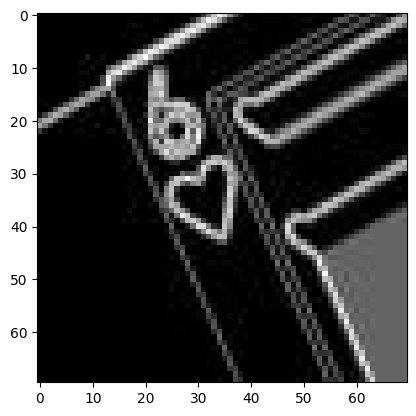

In [57]:
test_index = 1100
print(number[number_pred[test_index].argmax()])

plt.imshow(X_number_test[test_index],cmap='gray')

In [63]:
# 切割數據集為訓練集和測試集

X_suites_train, X_suites_test, y_suites_train, y_suites_test = train_test_split(suites_images.reshape(-1,70,70,1), one_hot_suites_labels, test_size=0.2, random_state=42)


# 建立卷積神經網絡模型
suitesmodel = Sequential()
suitesmodel.add(Input(shape=(70, 70, 1)))
suitesmodel.add(Conv2D(32, (3, 3),padding = 'same', activation='relu'))
suitesmodel.add(MaxPooling2D((2, 2)))
suitesmodel.add(Dropout(0.2))
suitesmodel.add(Conv2D(64, (3, 3),padding = 'same', activation='relu'))
suitesmodel.add(MaxPooling2D((2, 2)))
suitesmodel.add(Dropout(0.2))
suitesmodel.add(Conv2D(64, (3, 3),padding = 'same', activation='relu'))
suitesmodel.add(MaxPooling2D((2, 2)))
suitesmodel.add(Dropout(0.2))
suitesmodel.add(Conv2D(32, (3, 3),padding = 'same', activation='relu'))
suitesmodel.add(MaxPooling2D((2, 2)))
suitesmodel.add(Dropout(0.2))
suitesmodel.add(Flatten())
suitesmodel.add(Dense(128, activation='relu'))
suitesmodel.add(Dense(4, activation='softmax'))

# 編譯模型
opt = keras.optimizers.Adam()
suitesmodel.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

suitesmodel.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 70, 70, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 35, 35, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 35, 35, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 17, 17, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_34 (Dropout)        (None, 17, 17, 64)       

In [64]:
suitesmodel.fit(X_suites_train, y_suites_train,epochs=15, validation_data=(X_suites_test, y_suites_test),batch_size=64)

Epoch 1/15
75/75 [==============================] - 13s 145ms/step - loss: 1.3349 - accuracy: 0.3154 - val_loss: 1.1270 - val_accuracy: 0.4448
Epoch 2/15
75/75 [==============================] - 10s 131ms/step - loss: 0.9086 - accuracy: 0.5366 - val_loss: 0.7059 - val_accuracy: 0.6497
Epoch 3/15
75/75 [==============================] - 10s 132ms/step - loss: 0.6608 - accuracy: 0.6724 - val_loss: 0.5123 - val_accuracy: 0.7492
Epoch 4/15
75/75 [==============================] - 10s 135ms/step - loss: 0.5161 - accuracy: 0.7262 - val_loss: 0.4288 - val_accuracy: 0.7651
Epoch 5/15
75/75 [==============================] - 11s 148ms/step - loss: 0.4388 - accuracy: 0.7797 - val_loss: 0.4387 - val_accuracy: 0.7851
Epoch 6/15
75/75 [==============================] - 11s 142ms/step - loss: 0.3749 - accuracy: 0.8154 - val_loss: 0.3060 - val_accuracy: 0.8328
Epoch 7/15
75/75 [==============================] - 10s 132ms/step - loss: 0.3143 - accuracy: 0.8577 - val_loss: 0.2827 - val_accuracy: 0.8838

In [65]:
suitesmodel.save('SuitesCNN.keras')

In [66]:
suites_pred = suitesmodel.predict(X_suites_test)
number_pred = numbermodel.predict(X_suites_test)

38/38 [==============================] - 1s 18ms/step


d
6


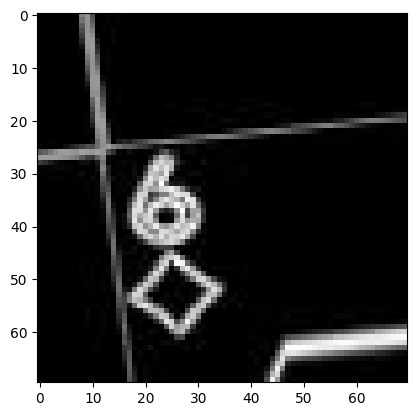

In [71]:
test_index = 170
print(suites[suites_pred[test_index].argmax()])
print(number[number_pred[test_index].argmax()])

plt.imshow(X_suites_test[test_index],cmap='gray')